In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv("dataset/breast-cancer-train.dat")
validate_data = pd.read_csv("dataset/breast-cancer-validate.dat")

with open("dataset/breast-cancer.labels") as f:
    column_names = f.read().splitlines()

train_data.columns = column_names
validate_data.columns = column_names

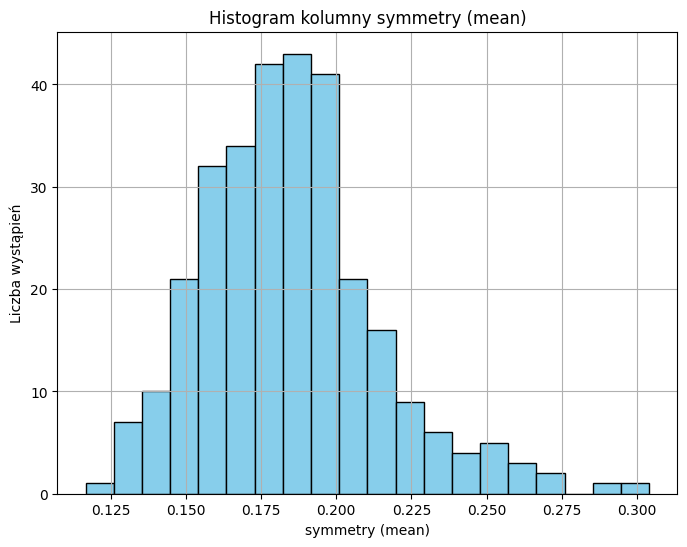

In [3]:
histogram_column = 'symmetry (mean)'  
plt.figure(figsize=(8, 6))
plt.hist(train_data[histogram_column], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram kolumny {histogram_column}')
plt.xlabel(histogram_column)
plt.ylabel('Liczba wystąpień')
plt.grid(True)
plt.show()

In [15]:
train_data[histogram_column].size

299

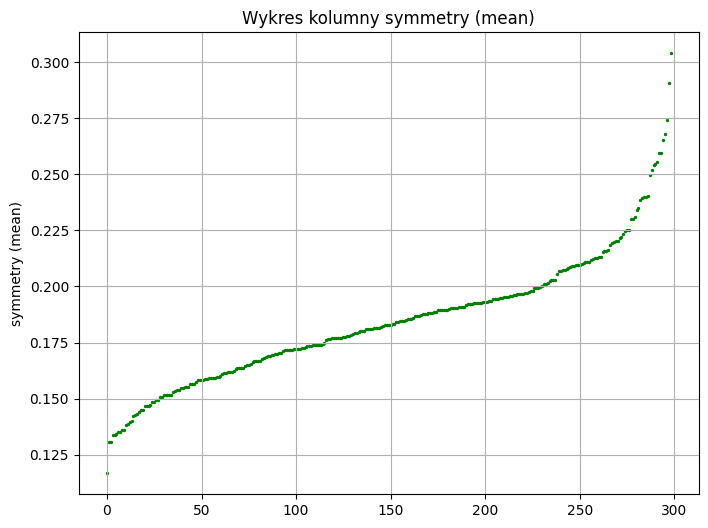

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(0,299),train_data[histogram_column].sort_values().reset_index(drop=True), color='green', s=2)
# plt.plot(np.arange(0,299), np.array([0.175 for _ in range(0,299)]), color="red", label="rak")
plt.title(f'Wykres kolumny {histogram_column}')
plt.ylabel(histogram_column)
plt.grid(True)
plt.show()

In [5]:
# Funkcja do utworzenia macierzy X i wektora y
def create_matrices(data, features):
    X = np.ones((len(data), len(features)))
    X[:, 0:] = data[features].values 
    Y = np.where(data['Malignant/Benign'] == 'M', 1, -1)
    return X, Y

In [6]:
# Funkcja do utworzenia macierzy X_quad i wektora y_quad dla kwadratowej metody najmniejszych kwadratów
def create_quadratic_matrices_vandermond(data, features):
    X = data[features].values
    X_quad = np.concatenate((X, X ** 2), axis=1)
    X_quad = np.concatenate((np.ones((X_quad.shape[0], 1)), X_quad), axis=1)
    y_quad = np.where(data['Malignant/Benign'] == 'M', 1, -1)
    return X_quad, y_quad

In [7]:
def create_quadratic_matrices(data, features):
    X = data[features].values
    X_quad = np.concatenate((X, X ** 2), axis=1)
    tab = []
    for k,row in enumerate(X):
        tmp = []
        for i in range(len(row)-1):
            for j in range(i+1, len(row)):
                tmp.append(X[k][i] * X[k][j])
        tab.append(tmp)
    X_quad = np.concatenate((X_quad, np.array(tab)), axis=1)
    y_quad = np.where(data['Malignant/Benign'] == 'M', 1, -1)
    return X_quad, y_quad


In [8]:
# All features except Patient ID and Malignant/Benign
linear_matrix_features = column_names[2:]
X_train, y_train = create_matrices(train_data, linear_matrix_features)
X_validate, y_validate = create_matrices(validate_data, linear_matrix_features)

In [9]:
w_linear_train = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))
w_linear_validate = np.linalg.solve(X_validate.T.dot(X_validate), X_validate.T.dot(y_validate))

In [10]:
quadratic_features = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']
X_quad_train, y_quad_train = create_quadratic_matrices(train_data, quadratic_features)
X_quad_validate, y_quad_validate = create_quadratic_matrices(validate_data, quadratic_features)

w_quad_train = np.linalg.solve(X_quad_train.T.dot(X_quad_train), X_quad_train.T.dot(y_quad_train))
w_quad_validate = np.linalg.solve(X_quad_validate.T.dot(X_quad_validate), X_quad_validate.T.dot(y_quad_validate))

In [11]:
# Obliczenie predykcji dla reprezentacji liniowej
predictions_linear = np.dot(X_validate, w_linear_train)
# print(predictions_linear)
# print(y_train)
# Obliczenie predykcji dla reprezentacji kwadratowej
predictions_quadratic = np.dot(X_quad_validate, w_quad_train)

# Definicja funkcji do oceny predykcji

# Ocena predykcji dla reprezentacji liniowej
# false_positives_linear, false_negatives_linear = evaluate_predictions(predictions_linear)

# Ocena predykcji dla reprezentacji kwadratowej
# false_positives_quadratic, false_negatives_quadratic = evaluate_predictions(predictions_quadratic)
# Ocena predykcji dla reprezentacji liniowej
false_positives_linear = np.sum((predictions_linear > 0) & (y_validate <= 0))
false_negatives_linear = np.sum((predictions_linear <= 0) & (y_validate > 0))

# Ocena predykcji dla reprezentacji kwadratowej
false_positives_quadratic = np.sum((predictions_quadratic > 0) & (y_validate <= 0))
false_negatives_quadratic = np.sum((predictions_quadratic <= 0) & (y_validate > 0))

# Ocena predykcji dla reprezentacji liniowej
true_positives_linear = np.sum((predictions_linear > 0) & (y_validate > 0))
true_negatives_linear = np.sum((predictions_linear <= 0) & (y_validate <= 0))

# Ocena predykcji dla reprezentacji kwadratowej
true_positives_quadratic = np.sum((predictions_quadratic > 0) & (y_validate > 0))
true_negatives_quadratic = np.sum((predictions_quadratic <= 0) & (y_validate <= 0))

#Błąd względny dla reprezentacji liniowej
linear_relative_error = (true_positives_linear + true_negatives_linear)/ (true_positives_linear + true_negatives_linear + false_negatives_linear + false_positives_linear)

#Błąd względny dla reprezentacji kwadratowej
quadratic_relative_error = (true_positives_quadratic + true_negatives_quadratic)/ (true_positives_quadratic + true_negatives_quadratic + false_negatives_quadratic + false_positives_quadratic)


print("Dla reprezentacji liniowej:")
print("Liczba prawdziwie pozytywnych przypadków:", true_positives_linear)
print("Liczba prawdziwie negatywnych przypadków:", true_negatives_linear)
print("Liczba fałszywie dodatnich przypadków:", false_positives_linear)
print("Liczba fałszywie ujemnych przypadków:", false_negatives_linear)
print("Błąd względny:", linear_relative_error)

print("\nDla reprezentacji kwadratowej:")
print("Liczba prawdziwie pozytywnych przypadków:", true_positives_quadratic)
print("Liczba prawdziwie negatywnych przypadków:", true_negatives_quadratic)
print("Liczba fałszywie dodatnich przypadków:", false_positives_quadratic)
print("Liczba fałszywie ujemnych przypadków:", false_negatives_quadratic)
print("Błąd względny:", quadratic_relative_error)

Dla reprezentacji liniowej:
Liczba prawdziwie pozytywnych przypadków: 57
Liczba prawdziwie negatywnych przypadków: 194
Liczba fałszywie dodatnich przypadków: 6
Liczba fałszywie ujemnych przypadków: 2
Błąd względny: 0.9691119691119691

Dla reprezentacji kwadratowej:
Liczba prawdziwie pozytywnych przypadków: 54
Liczba prawdziwie negatywnych przypadków: 185
Liczba fałszywie dodatnich przypadków: 15
Liczba fałszywie ujemnych przypadków: 5
Błąd względny: 0.9227799227799228


In [12]:
cond_linear = np.linalg.cond(X_train.T.dot(X_train))

print("Współczynnik uwarunkowania macierzy dla reprezentacji liniowej:", cond_linear)

cond_quad = np.linalg.cond(X_quad_train.T.dot(X_quad_train))
print("Współczynnik uwarunkowania macierzy dla reprezentacji kwadratowej:", cond_quad)


Współczynnik uwarunkowania macierzy dla reprezentacji liniowej: 1803175716320.3635
Współczynnik uwarunkowania macierzy dla reprezentacji kwadratowej: 9.028541457073665e+17
